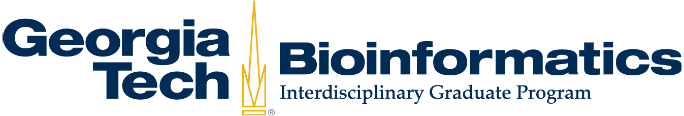

## Polygenic risk scores

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Knowing the data**

---

<div class="alert alert-block alert-warning">
    <h3>1.1 PGS Catalog</h3>
    <p></p>
</div>

#### Check the link at: https://www.pgscatalog.org/score/PGS000713/

<div class="alert alert-block alert-warning">
    <h3>1.2 Genetic data.</h3>
    <p>We will use ~500 samples from the 1000 genomes project</p>    
</div>

In [1]:
#Check out the populations of interest.
!cat VCF/popsOfInterest.txt

GBR
IBS
ACB
CLM
ASW


In [17]:
#Check the vcf file.
!zcat VCF/sampled1000Genomes.vcf.gz | grep -v "##" | head -n2

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	ACB_ACB1	ACB_ACB2	ACB_ACB3	ACB_ACB4	ACB_ACB5	ACB_ACB6	ACB_ACB7	ACB_ACB8	ACB_ACB9	ACB_ACB10	ACB_ACB11	ACB_ACB12	ACB_ACB13	ACB_ACB14	ACB_ACB15	ACB_ACB16	ACB_ACB17	ACB_ACB18	ACB_ACB19	ACB_ACB20	ACB_ACB21	ACB_ACB22	ACB_ACB23	ACB_ACB24	ACB_ACB25	ACB_ACB26	ACB_ACB27	ACB_ACB28	ACB_ACB29	ACB_ACB30	ACB_ACB31	ACB_ACB32	ACB_ACB33	ACB_ACB34	ACB_ACB35	ACB_ACB36	ACB_ACB37	ACB_ACB38	ACB_ACB39	ACB_ACB40	ACB_ACB41	ACB_ACB42	ACB_ACB43	ACB_ACB44	ACB_ACB45	ACB_ACB46	ACB_ACB47	ACB_ACB48	ACB_ACB49	ACB_ACB50	ACB_ACB51	ACB_ACB52	ACB_ACB53	ACB_ACB54	ACB_ACB55	ACB_ACB56	ACB_ACB57	ACB_ACB58	ACB_ACB59	ACB_ACB60	ACB_ACB61	ACB_ACB62	ACB_ACB63	ACB_ACB64	ACB_ACB65	ACB_ACB66	ACB_ACB67	ACB_ACB68	ACB_ACB69	ACB_ACB70	ACB_ACB71	ACB_ACB72	ACB_ACB73	ACB_ACB74	ACB_ACB75	ACB_ACB76	ACB_ACB77	ACB_ACB78	ACB_ACB79	ACB_ACB80	ACB_ACB81	ACB_ACB82	ACB_ACB83	ACB_ACB84	ACB_ACB85	ACB_ACB86	ACB_ACB87	ACB_ACB88	ACB_ACB89	ACB_ACB90	ACB_ACB91	ACB_ACB92	ACB_ACB93	ACB_ACB94	ACB_ACB95	ACB_ACB96	ASW

In [6]:
#Check the PGS GWAS file.
!head PRS/PGS000713_hmPOS_GRCh38.txt -n25


###PGS CATALOG SCORING FILE - see https://www.pgscatalog.org/downloads/#dl_ftp_scoring for additional information
#format_version=2.0
##POLYGENIC SCORE (PGS) INFORMATION
#pgs_id=PGS000713
#pgs_name=T2D
#trait_reported=T2D
#trait_mapped=type 2 diabetes mellitus
#trait_efo=MONDO_0005148
#genome_build=hg19
#variants_number=183830
#weight_type=weights.T2D
##SOURCE INFORMATION
#pgp_id=PGP000128
#citation=Sinnott-Armstrong N et al. Nat Genet (2021). doi:10.1038/s41588-020-00757-z
#license=Creative Commons Attribution 4.0 International (CC BY 4.0)
##HARMONIZATION DETAILS
#HmPOS_build=GRCh38
#HmPOS_date=2022-07-29
#HmPOS_match_chr={"True": null, "False": null}
#HmPOS_match_pos={"True": null, "False": null}
rsID	chr_name	chr_position	effect_allele	other_allele	effect_weight	variant_description	hm_source	hm_rsID	hm_chr	hm_pos	hm_inferOtherAllele
rs12562034	1	768448	A	G	0.00121429454800515		ENSEMBL	rs12562034	1	833068	
rs11240779	1	808631	A	G	-0.00132475448199809		ENSEMBL	rs11240779	1	873251	
rs4

---

### Read about phenotypes used in more Sophisticated PRS calculators. Covariates are important in genetic analyses

#### PRSice-2 is a popular tool for calculating PRS: https://choishingwan.github.io/PRS-Tutorial/prsice/

#### Also look into LD clumping: https://www.biostars.org/p/343818/

---

# **2. Harmonizing the data**

---

In [15]:
#Recode the summary stat file.
!cat PRS/PGS000713_hmPOS_GRCh38.txt | grep -v "#" | awk 'NR>1{ print $2"\:"$3"\t"$4"\t"$6  }' > PRS/PGS000713_hmPOS_GRCh38.forPlink.txt

awk: cmd. line:1: warning: escape sequence `\:' treated as plain `:'


In [16]:
#Check the file created.
!cat PRS/PGS000713_hmPOS_GRCh38.forPlink.txt | head


1:768448	A	0.00121429454800515
1:808631	A	-0.00132475448199809
1:838555	A	0.000369500591399508
1:840753	C	-0.000248881704732362
1:846864	C	-0.000268721980404507
1:849998	G	-0.000259289329454404
1:850780	T	0.000940169753818054
1:858051	T	-0.00411526396057171
1:866938	A	-0.000108413224855664
1:873558	T	5.22624268519678e-05
cat: write error: Broken pipe


In [19]:
#Check the vcf file.
!zcat VCF/sampled1000Genomes.vcf.gz | grep -v "##" | head -n5 | cut -f1-15

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	ACB_ACB1	ACB_ACB2	ACB_ACB3	ACB_ACB4	ACB_ACB5	ACB_ACB6
1	10177	1:10177	A	AC	.	.	PR	GT	0/0	0/1	0/0	0/0	0/0	0/1
1	10235	1:10235	T	TA	.	.	PR	GT	0/0	0/0	0/0	0/0	0/0	0/0
1	10352	1:10352	T	TA	.	.	PR	GT	0/0	0/1	0/1	0/1	0/1	0/1
1	10505	1:10505	A	T	.	.	PR	GT	0/0	0/0	0/0	0/0	0/0	0/0
grep: write error

gzip: stdout: Broken pipe


# **3. Calculating the PRS**

---

In [21]:
#Convert files to Plink2 binary format.
#This might be a challenge, but a few google searches should help.
!plink2 --vcf VCF/sampled1000Genomes.vcf.gz --make-pgen --out Plink/sampled1000Genomes

In [23]:
#Run plink command for scores.
!plink2 --pfile Plink/sampled1000Genomes --score PRS/PGS000713_hmPOS_GRCh38.forPlink.txt 1 2 3 --out Scores/PGS000713.PRS

PLINK v2.00a3.7LM 64-bit Intel (24 Oct 2022)   www.cog-genomics.org/plink/2.0/
(C) 2005-2022 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Scores/PGS000713.PRS.log.
Options in effect:
  --out Scores/PGS000713.PRS
  --pfile Plink/sampled1000Genomes
  --score PRS/PGS000713_hmPOS_GRCh38.forPlink.txt 1 2 3

Start time: Wed Oct 25 01:55:13 2023
511705 MiB RAM detected; reserving 255852 MiB for main workspace.
Using up to 28 threads (change this with --threads).
449 samples (0 females, 0 males, 449 ambiguous; 449 founders) loaded from
Plink/sampled1000Genomes.psam.
80586302 variants loaded from Plink/sampled1000Genomes.pvar.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899done.
and 2716 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier t

In [24]:
##Check the out.
!head Scores/PGS000713.PRS.sscore

#IID	ALLELE_CT	NAMED_ALLELE_DOSAGE_SUM	SCORE1_AVG
ACB_ACB1	9192	4073	-1.26482e-05
ACB_ACB2	9192	4102	-1.28347e-05
ACB_ACB3	9192	4074	-3.40974e-06
ACB_ACB4	9192	4066	5.80866e-06
ACB_ACB5	9192	4081	-8.38155e-06
ACB_ACB6	9192	4076	-1.75298e-06
ACB_ACB7	9192	4044	-1.79941e-05
ACB_ACB8	9192	4068	-1.35084e-05
ACB_ACB9	9192	4045	-1.40183e-05


## Visualize the scores.

In [37]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple


In [33]:
scores = pd.read_csv('Scores/PGS000713.PRS.sscore', sep="\t")
scores.head()

,#IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG
0,ACB_ACB1,9192,4073,-0.000013
1,ACB_ACB2,9192,4102,-0.000013
2,ACB_ACB3,9192,4074,-0.000003
3,ACB_ACB4,9192,4066,0.000006
4,ACB_ACB5,9192,4081,-0.000008


In [34]:
scores[['Pop', 'ID']] = scores['#IID'].str.split('_', expand=True)
scores.head()


,#IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,Pop,ID
0,ACB_ACB1,9192,4073,-0.000013,ACB,ACB1
1,ACB_ACB2,9192,4102,-0.000013,ACB,ACB2
2,ACB_ACB3,9192,4074,-0.000003,ACB,ACB3
3,ACB_ACB4,9192,4066,0.000006,ACB,ACB4
4,ACB_ACB5,9192,4081,-0.000008,ACB,ACB5


In [36]:
scores['ScaledPRS'] = zscore(scores['SCORE1_AVG'])
scores.head()


,#IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,Pop,ID,ScaledPRS
0,ACB_ACB1,9192,4073,-0.000013,ACB,ACB1,0.417270
1,ACB_ACB2,9192,4102,-0.000013,ACB,ACB2,0.404405
2,ACB_ACB3,9192,4074,-0.000003,ACB,ACB3,1.054522
3,ACB_ACB4,9192,4066,0.000006,ACB,ACB4,1.690391
4,ACB_ACB5,9192,4081,-0.000008,ACB,ACB5,0.711576


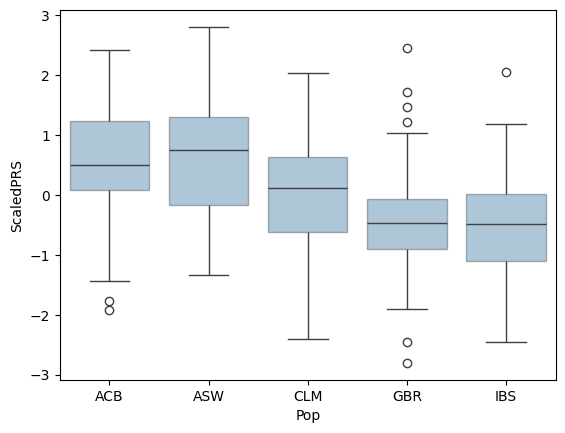

In [38]:
#Plot some boxplots by Pop.
ax = sns.boxplot(data=scores, x="Pop", y="ScaledPRS", boxprops={'alpha': 0.4})
